# 高斯模糊原理与具体Python编程实现
# 1. 高斯模糊有啥用？
[高斯模糊](https://baike.baidu.com/item/%E9%AB%98%E6%96%AF%E6%A8%A1%E7%B3%8A/10885810)如下图所示。可以看到它经常被用在APP等UI界面的设计中，当然还有其他应用如：马赛克。今天我们就来从原理上和编程上聊下这玩意。

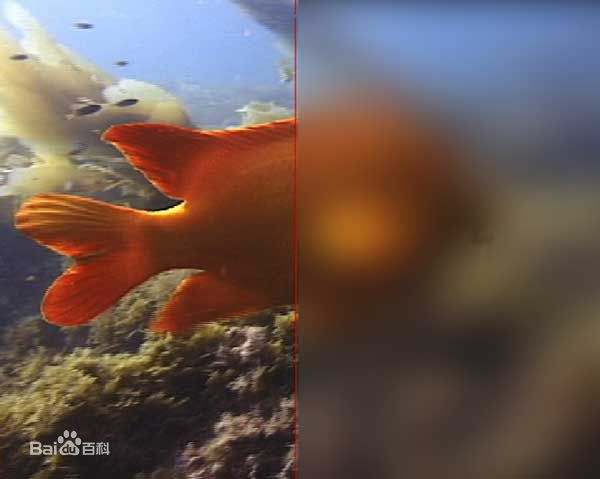

# 2. 如何理解高斯模糊？

其实只要你看到模糊化就可以把它替换成光滑化。一般图像光滑化的方式是对所有的像素点进行卷积操作。一提到卷积操作第一反应是它的卷积核是什么。因为卷积操作就是需要让卷积核与图片矩阵进行对应元素相乘然后求和。卷积核就是一个矩阵。因此**高斯模糊就是让卷积核的值服从高斯分布。**那么怎么操作呢？答：假设卷积核矩阵是conv_mat，并且假设`conv_mat[x][y]`表示矩阵中第x行第y列的那个元素。那么高斯模糊是这么给卷积核矩阵赋值的$conv_mat[x][y]=\frac{1}{2\pi \delta ^2}e^{-(x^2+y^2)/(2\delta^2)}$，注意$\delta$是一个常数这需要我们设置，`conv_mat[x][y]`表示矩阵中第x行第y列的那个元素。


参考文献：
[http://inside.mines.edu/~whoff/courses/EENG512/lectures/06-ImageFiltering.pdf](http://inside.mines.edu/~whoff/courses/EENG512/lectures/06-ImageFiltering.pdf)

原始图片


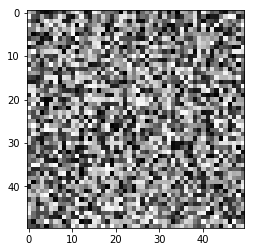

卷积核可视化为


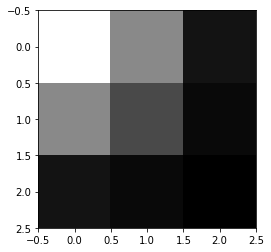

卷积后的图片


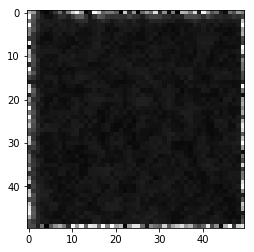

lenna原始图像


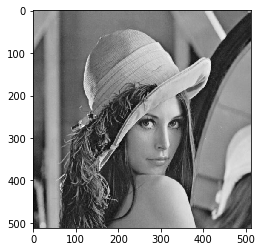

使用高斯卷积后的lenna为


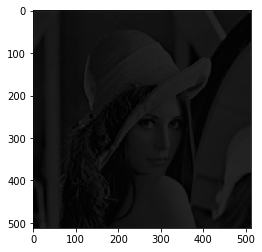

In [49]:
import numpy as np
# 图片就是一个矩阵，下面是一个图片矩阵，我们演示下卷积操作
img = np.random.random((50,50))
"""# 我们看看这个图片长啥样 """
import matplotlib.pyplot as plt
print("原始图片")
plt.imshow(img,cmap='gray')
plt.show()
""" 
1. 一提到卷积操作第一反应是它的卷积核是什么。因为卷积操作就是需要让卷积核与图片矩阵进行对应元素相乘然后求和
那么问题来了什么是卷积核?
答：卷积核就是一个小矩阵
""" 
# 二维高斯函数
def gaussian(x,y):
    delta = 0.9
    return (np.exp(-(x**2 + y**2)/(2 * delta**2)))/(2 * np.pi * delta**2)

kernel_dim = 3
conv_kernel = np.ones((kernel_dim,kernel_dim))

for row in range(kernel_dim):
    for col in range(kernel_dim):
        conv_kernel[row][col] = gaussian(row,col)  
print("卷积核可视化为")
plt.imshow(conv_kernel,cmap='gray')
plt.show()

def conv(mat,conv_kernel):# mat与conv_kernel形状大小要一样
    return np.sum(mat*conv_kernel)


# 对图像中所有像素点进行卷积操作
for row in range(1,img.shape[0]-1):
    for col in range(1,img.shape[0]-1):
        localMat = img[row-1:row+2,col-1:col+2]
        img[row][col] = conv(localMat,conv_kernel)
# 显示卷积后的图片
print("卷积后的图片")
plt.imshow(img,cmap='gray')
plt.show()

# 我们用真实图片处理下看效果
import cv2
lenna_img_mat = cv2.imread("./lenna.jpg",cv2.IMREAD_GRAYSCALE)
print("lenna原始图像")
plt.imshow(lenna_img_mat,cmap='gray')
plt.show()
# 对图像中所有像素点进行卷积操作
for row in range(1,lenna_img_mat.shape[0]-1):
    for col in range(1,lenna_img_mat.shape[0]-1):
        localMat = lenna_img_mat[row-1:row+2,col-1:col+2]
        lenna_img_mat[row][col] = conv(localMat,conv_kernel)
print("使用高斯卷积后的lenna为")
plt.imshow(lenna_img_mat,cmap='gray')
plt.show()
